<a href="https://colab.research.google.com/github/rahithJ/DS-Mylearning-/blob/main/analyticsvidhyafirstassign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler,OneHotEncoder


In [95]:
df1 = pd.read_csv('https://raw.githubusercontent.com/rahithJ/DS-Mylearning-/main/analyticsVidhyaFirstAssignment/train_ctrUa4K.csv')
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [96]:
df2 = pd.read_csv('https://raw.githubusercontent.com/rahithJ/DS-Mylearning-/main/analyticsVidhyaFirstAssignment/test_lAUu6dG.csv')
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [97]:
df1.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [98]:
for i in df1.columns:
  print('\n')
  print(df1[i].value_counts())
  print('*'*40)



LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
****************************************


Male      489
Female    112
Name: Gender, dtype: int64
****************************************


Yes    398
No     213
Name: Married, dtype: int64
****************************************


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
****************************************


Graduate        480
Not Graduate    134
Name: Education, dtype: int64
****************************************


No     500
Yes     82
Name: Self_Employed, dtype: int64
****************************************


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
****************************************


0.0       273
2500.0      5
2083.0      5

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


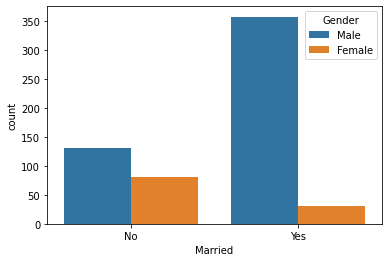

In [100]:
sns.countplot(x='Married',hue='Gender',data=df1)

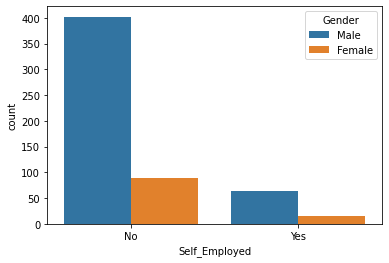

In [101]:
sns.countplot(x='Self_Employed',hue='Gender',data=df1)

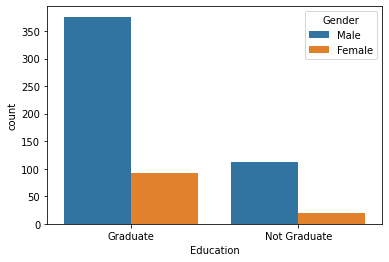

In [102]:
sns.countplot(x='Education',hue='Gender',data=df1)

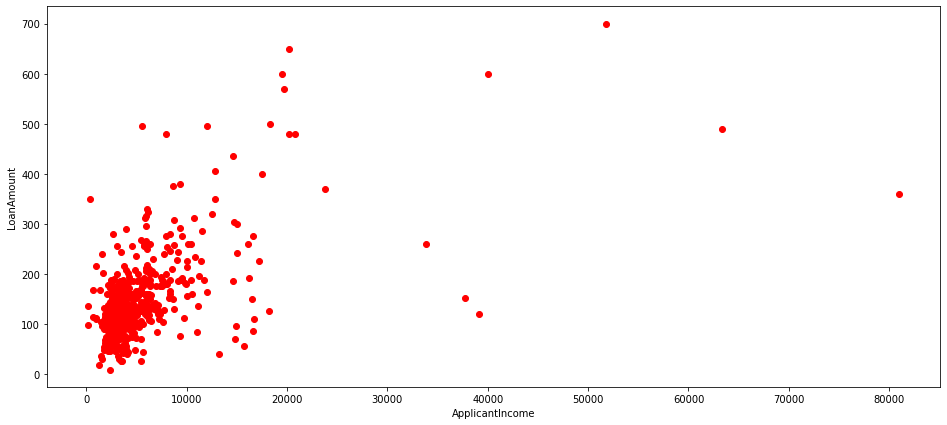

In [103]:
plt.figure(figsize=(16,7))
plt.scatter(x=df1['ApplicantIncome'],y=df1['LoanAmount'],c=['red'])
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


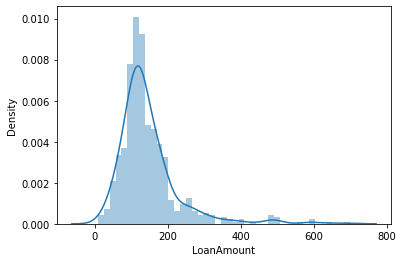

In [104]:
sns.distplot(a=df1['LoanAmount'], hist=True, kde=True)

In [105]:
gender_group = df1.groupby('Gender').agg({'ApplicantIncome':'mean'})
gender_group

,ApplicantIncome
Gender,
Female,4643.473214
Male,5446.460123


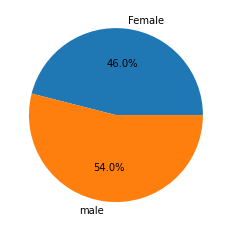

In [173]:
plt.pie(gender_group['ApplicantIncome'],autopct='%1.1f%%',labels=['Female','male'],)
plt.show()

Male got high Income than women

In [107]:
group_area=df1.groupby('Property_Area').agg({'LoanAmount':'sum'})

In [108]:
group_area

,LoanAmount
Property_Area,
Rural,26341.0
Semiurban,33175.0
Urban,27160.0


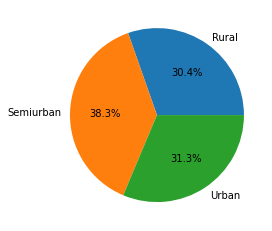

In [174]:
plt.pie(group_area['LoanAmount'],autopct='%1.1f%%',labels=['Rural','Semiurban','Urban'],)
plt.show()

Semiurban got high loan followed by urban and then rural

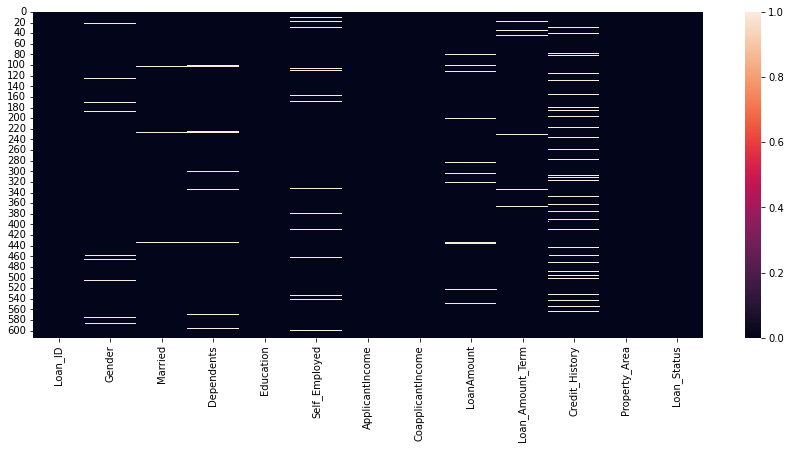

In [110]:
plt.figure(figsize=(15,6))
sns.heatmap(df1.isnull())
plt.show()

In [111]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [112]:
df1.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [113]:
obj_data = [var for var in df1.columns if np.dtype(df1[var])=='object']
obj_data

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [114]:
num_data = [var for var in df1.columns if np.dtype(df1[var])!='object']
num_data

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [115]:
#remove loan_id 
df1.drop(columns=['Loan_ID'],axis=1,inplace=True)

In [116]:
for i in df1[num_data]:
  print('\n')
  print('mean :',df1[i].mean())
  print('median :',df1[i].median())
  print('mode :',df1[i].mode()[0])
  print('std :',df1[i].std())
  



mean : 5403.459283387622
median : 3812.5
mode : 2500
std : 6109.041673387178


mean : 1621.2457980271008
median : 1188.5
mode : 0.0
std : 2926.2483692241885


mean : 146.41216216216216
median : 128.0
mode : 120.0
std : 85.58732523570545


mean : 342.0
median : 360.0
mode : 360.0
std : 65.12040985461256


mean : 0.8421985815602837
median : 1.0
mode : 1.0
std : 0.3648783192364048


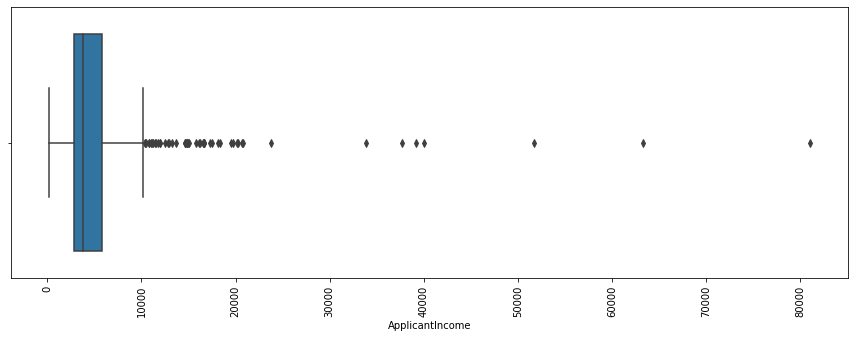

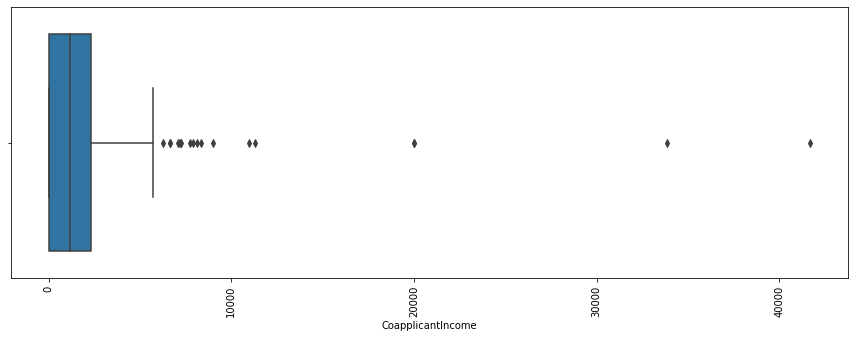

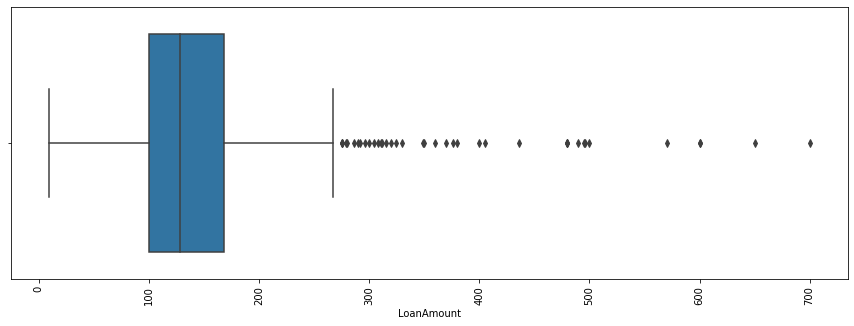

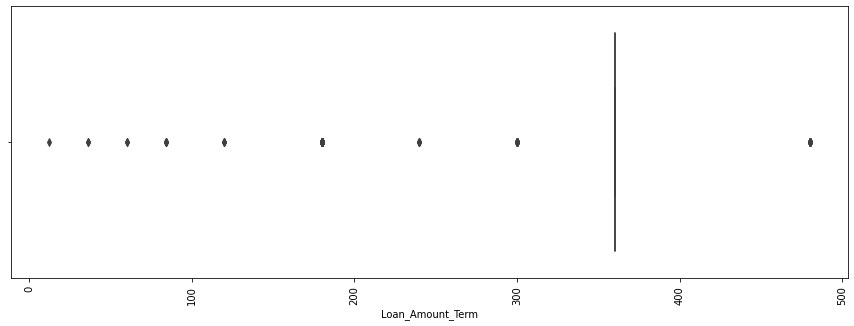

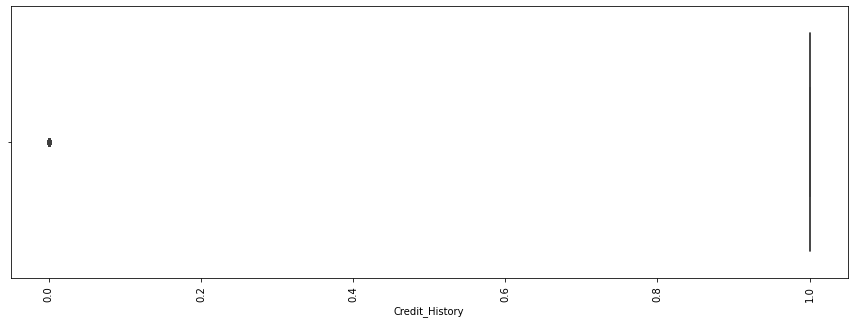

In [117]:
for i in df1[num_data]:
  plt.figure(figsize=(15, 5))
  sns.boxplot(x=df1[i])
  plt.xticks(rotation = 90)
  plt.show()

In [118]:
df1[num_data]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [119]:
df1.ApplicantIncome.fillna(df1.ApplicantIncome.median(),inplace=True)
df1.CoapplicantIncome.fillna(df1.CoapplicantIncome.median(),inplace=True)
df1.LoanAmount.fillna(df1.LoanAmount.median(),inplace=True)
df1.Loan_Amount_Term.fillna(df1.Loan_Amount_Term.mode()[0],inplace=True)
df1.Credit_History.fillna(df1.Credit_History.mode()[0],inplace=True)

In [120]:
df1.Gender.fillna(df1.Gender.mode()[0],inplace=True)
df1.Married.fillna(df1.Married.mode()[0],inplace=True)
df1.Dependents.fillna(df1.Dependents.mode()[0],inplace=True)
df1.Self_Employed.fillna(df1.Self_Employed.mode()[0],inplace=True)

In [121]:
df1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [122]:
obj_data.remove('Loan_ID')

In [123]:
od = OrdinalEncoder()
od.fit(df1[obj_data])
df1[obj_data] = od.transform(df1[obj_data])

In [124]:
ss = MinMaxScaler()
ss.fit(df1)
df1 = ss.transform(df1)

In [125]:
df1 = pd.DataFrame(df1,columns=['Gender',	'Married',	'Dependents','Education',	'Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History',	'Property_Area',	'Loan_Status'])

In [126]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.743590,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0,1.0
610,1.0,1.0,1.000000,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0,1.0
611,1.0,1.0,0.333333,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0,1.0
612,1.0,1.0,0.666667,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0,1.0


In [127]:
df2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [128]:
df2.drop(columns=['Loan_ID'],inplace=True)

In [129]:
df2.Gender.fillna(df2.Gender.mode()[0],inplace=True)
df2.Dependents.fillna(df2.Dependents.mode()[0],inplace=True)
df2.Self_Employed.fillna(df2.Self_Employed.mode()[0],inplace=True)
df2.LoanAmount.fillna(df2.LoanAmount.median(),inplace=True)
df2.Loan_Amount_Term.fillna(df2.Loan_Amount_Term.mode()[0],inplace=True)
df2.Credit_History.fillna(df2.Credit_History.mode()[0],inplace=True)

In [130]:
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [131]:
obj_data.remove('Loan_Status')

In [132]:
od1 = OrdinalEncoder()
od1.fit(df2[obj_data])
df2[obj_data] = od1.transform(df2[obj_data])

In [133]:
df2[obj_data] 

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1.0,1.0,0.0,0.0,0.0,2.0
1,1.0,1.0,1.0,0.0,0.0,2.0
2,1.0,1.0,2.0,0.0,0.0,2.0
3,1.0,1.0,2.0,0.0,0.0,2.0
4,1.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...
362,1.0,1.0,3.0,1.0,1.0,2.0
363,1.0,1.0,0.0,0.0,0.0,2.0
364,1.0,0.0,0.0,0.0,0.0,1.0
365,1.0,1.0,0.0,0.0,0.0,0.0


In [134]:
ss1 = MinMaxScaler()
ss.fit(df2)
nn1 = ss.transform(df2)

In [135]:
df2 = pd.DataFrame(nn1,columns=[df2.columns])

In [136]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [137]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.000000,0.0,0.0,0.078865,0.000000,0.157088,0.746835,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.042411,0.062500,0.187739,0.746835,1.0,1.0
2,1.0,1.0,0.666667,0.0,0.0,0.068938,0.075000,0.344828,0.746835,1.0,1.0
3,1.0,1.0,0.666667,0.0,0.0,0.032263,0.106083,0.137931,0.746835,1.0,1.0
4,1.0,0.0,0.000000,1.0,0.0,0.045168,0.000000,0.095785,0.746835,1.0,1.0


In [138]:
x_train = df1.iloc[:,:-1]
y_train = df1.iloc[:,-1]

In [139]:
df1.iloc[:,-1]

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 614, dtype: float64

In [140]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.743590,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0
610,1.0,1.0,1.000000,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0
611,1.0,1.0,0.333333,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0
612,1.0,1.0,0.666667,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0


In [141]:
y_train.astype('float32')

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 614, dtype: float32

In [142]:
np.dtype(y_train)

dtype('float64')

In [143]:
x_test = df2

In [144]:
GaussianNB,MultinomialNB

(sklearn.naive_bayes.GaussianNB, sklearn.naive_bayes.MultinomialNB)

In [145]:
gnb = GaussianNB()

In [146]:
gnb.fit(x_train,y_train)

GaussianNB()

In [147]:
y_predict_gaussian = gnb.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


In [148]:
y_predict_gaussian

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

In [149]:
y_test = pd.read_csv('https://raw.githubusercontent.com/rahithJ/DS-Mylearning-/main/analyticsVidhyaFirstAssignment/sample_submission_49d68Cx.csv')


In [150]:
y_test.drop(columns=['Loan_ID'],inplace=True)

In [151]:
y_test.Loan_Status.unique()

array(['N'], dtype=object)

In [152]:
y_test = pd.get_dummies(y_test)

In [153]:
accuracy_score(y_test,y_predict_gaussian)

0.771117166212534

In [154]:
precision_score(y_test,y_predict_gaussian)

1.0

In [155]:
confusion_matrix(y_test,y_predict_gaussian)

array([[  0,   0],
       [ 84, 283]])

In [156]:
print(classification_report(y_test,y_predict_gaussian))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.77      0.87       367

    accuracy                           0.77       367
   macro avg       0.50      0.39      0.44       367
weighted avg       1.00      0.77      0.87       367



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


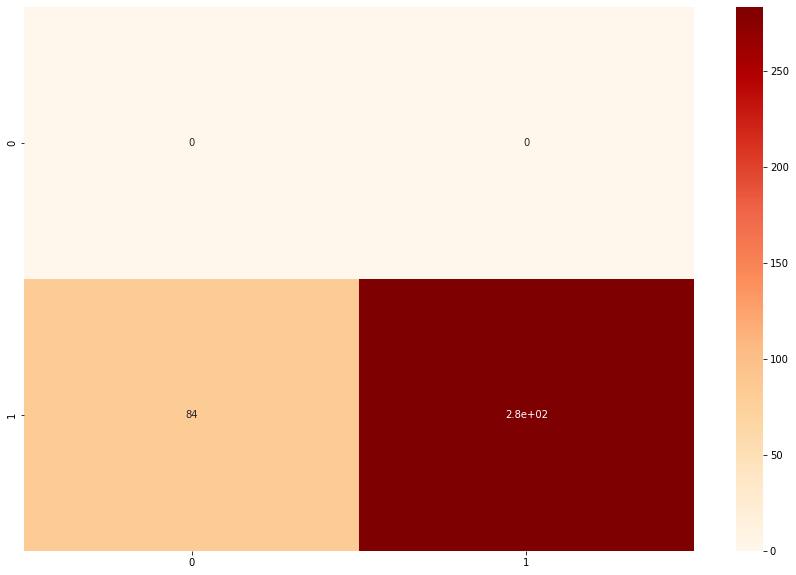

In [157]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test,y_predict_gaussian),cmap='OrRd',annot=True)
plt.show()

In [158]:
y_train.unique()

array([1., 0.])

In [159]:
MultiNB = MultinomialNB()

In [160]:
MultiNB.fit(x_train,y_train)

MultinomialNB()

In [161]:
y_predict_multi = MultiNB.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


In [162]:
accuracy_score(y_test,y_predict_multi)

0.997275204359673

In [163]:
confusion_matrix(y_test,y_predict_multi)

array([[  0,   0],
       [  1, 366]])

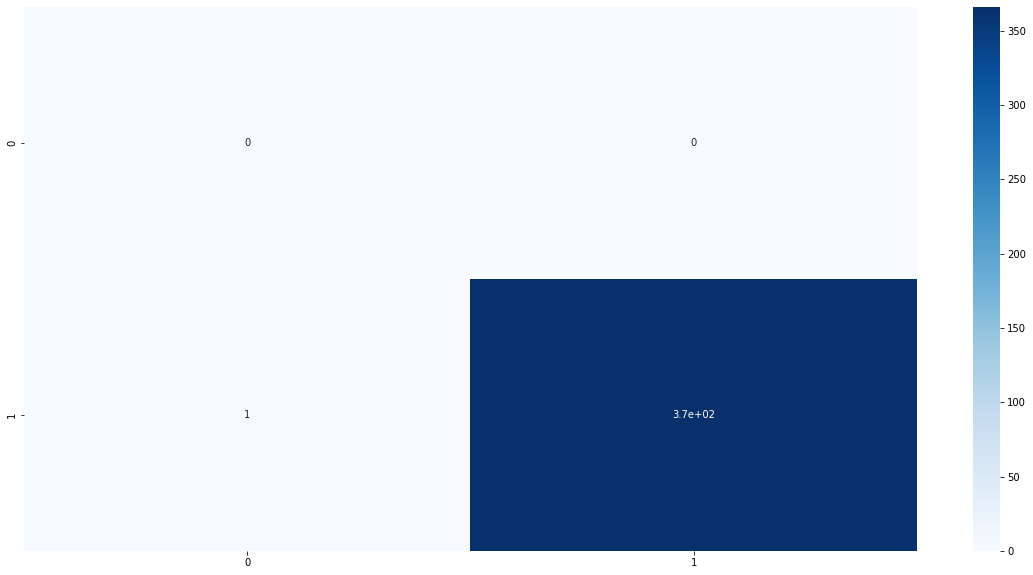

In [171]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test,y_predict_multi),cmap='Blues',annot=True,xticklabels=True,yticklabels=True)
plt.show()

In [165]:
print(classification_report(y_test,y_predict_multi))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      1.00      1.00       367

    accuracy                           1.00       367
   macro avg       0.50      0.50      0.50       367
weighted avg       1.00      1.00      1.00       367



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


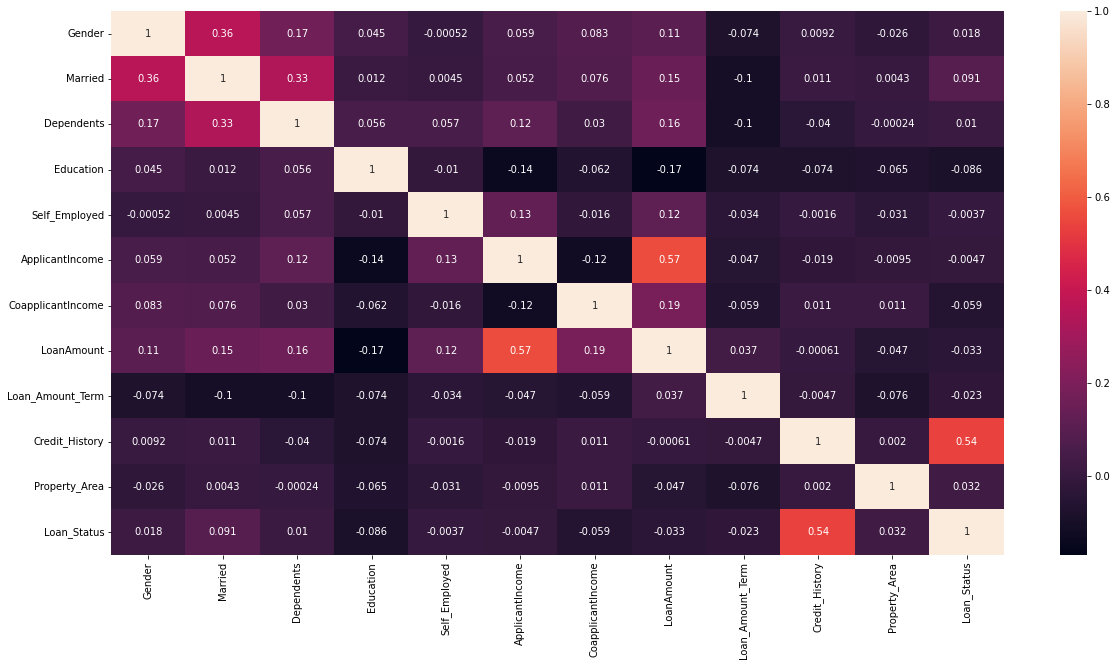

In [170]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,xticklabels=True,yticklabels=True)
plt.show()

In [167]:
y_test

,Loan_Status_N
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1
